# Filtro de Kalman
* Sofía Salgarriaga Jiménez
* Pablo Osorio López
* Paola Andrea Fernández López
* Juliana Vallejo Díez
* Nicolás Villegas Vargas
* María Camila Vásquez Correa

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

**Simulación GLM**

In [2]:
A = np.matrix([[.75,-0.25],[.2,.3]])
D = np.matrix([[1,0],[0,1]])

In [64]:
def ruido(mu1, mu2, sigma1, sigma2, alfa, nobs):
    serie = np.zeros(nobs);
    dist1 = np.zeros(int(alfa*100));
    dist2 = np.ones(int((1-alfa)*100));
    dist = np.append(dist1,dist2);
    for i in range(nobs):
        a = np.random.randint(low=1,high=100)
        b = dist[a]
        samp = [sigma1*np.random.normal() + mu1, sigma2*np.random.normal() + mu2];
        serie[i] = samp[int(b)]   
    return serie

In [99]:
nobs = 250
X = np.zeros((nobs,2))
mu1 = 10
mu2 = 2
sigma1 = 0.7
sigma2 = 0.04
alfa = 0.3
#e1 = ruido(mu1, mu2, sigma1, sigma2, alfa, nobs)
#e2 = ruido(mu1, mu2, sigma1, sigma2, alfa, nobs)
e1 = np.random.normal(size = nobs)
e2 = np.random.normal(size = nobs)
X[0] = np.array([-1,1])
for i in range(1,nobs):
    X[i] = A@X[i-1] + D@[e1[i],e2[i]]

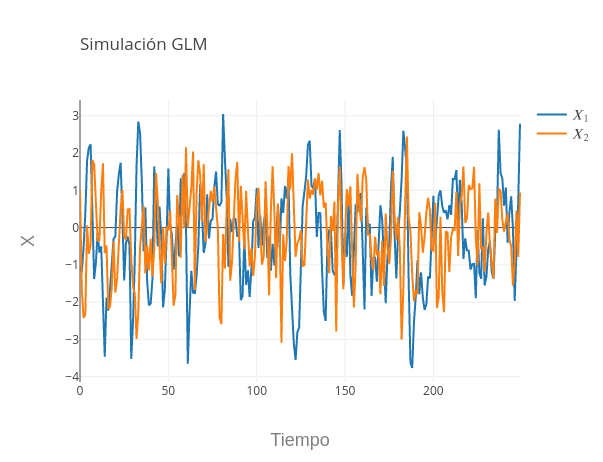

In [100]:
trace1 = go.Scatter(
    y = X.T[0],
    x = np.arange(nobs),
    name = '$X_1$'
)

trace2 = go.Scatter(
    y = X.T[1],
    x = np.arange(nobs),
    name = '$X_2$'
)

data = [trace1, trace2]
layout = go.Layout(
    title=go.layout.Title(
        text='Simulación GLM',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='X',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GLM')

## Filtro

In [101]:
# Inicialización
F = np.matrix([[0.1,0],[0.001,0.0021]])
H = np.matrix([[1,0],[0,1]])
Z = np.zeros((nobs,2))
Z1 = np.zeros((nobs,2))
Sigma = np.matrix([[0,0],[0,0]])
Sigma1 = np.matrix([[0,0],[0,0]])
Z[0] = np.matrix([0,0])
Q = 2*np.eye(2)
R = np.eye(2)

In [102]:
for i in range(0,nobs-1):
#i = 0
#if 1:
    # Predicción
    Z1[i] = F@Z[i]
    Sigma1 = F@Sigma@F.T + Q
    # Corrección
    Mt = Sigma1@H.T@np.linalg.inv(H@Sigma1@H.T + R)
    Z[i+1] = Z1[i] + (Mt@(X[i]-Z1[i]-H@Z1[i]).T).T
    Sigma = Sigma1@H.T@np.linalg.inv(H@Sigma1@H.T+R)

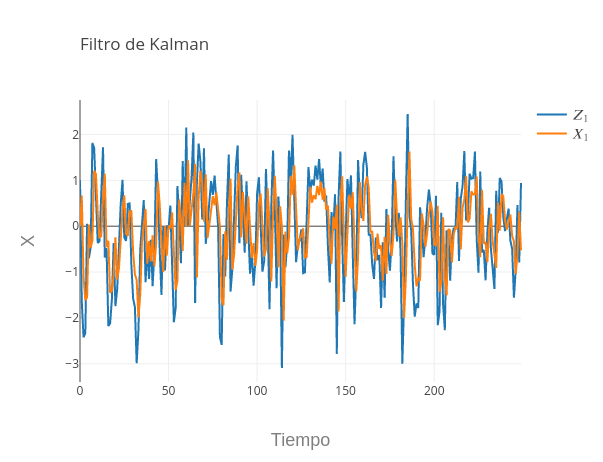

In [103]:
trace1 = go.Scatter(
    y = X.T[1],
    x = np.arange(nobs),
    name = '$Z_1$'
)

trace2 = go.Scatter(
    y = Z.T[1],
    x = np.arange(nobs),
    name = '$X_1$'
)

data = [trace1, trace2]
layout = go.Layout(
    title=go.layout.Title(
        text='Filtro de Kalman',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='X',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='KF')

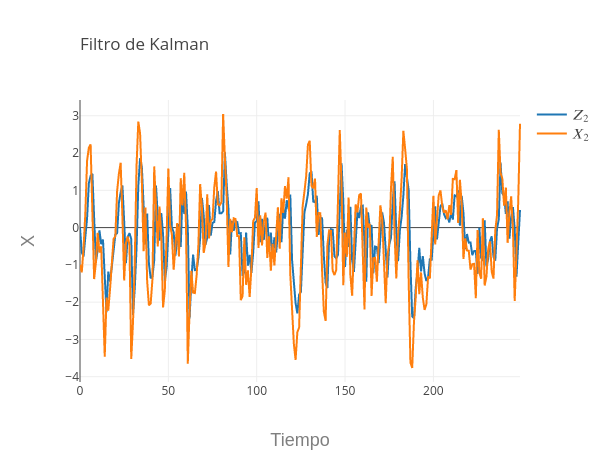

In [104]:
trace1 = go.Scatter(
    y = Z.T[0],
    x = np.arange(nobs),
    name = '$Z_2$'
)

trace2 = go.Scatter(
    y = X.T[0],
    x = np.arange(nobs),
    name = '$X_2$'
)

data = [trace1, trace2]
layout = go.Layout(
    title=go.layout.Title(
        text='Filtro de Kalman',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Tiempo',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='X',
            font=dict(
                family='Arial',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='GLM')

In [105]:
np.max([np.abs((Z.T[1][i] - X.T[1][i-1])/X.T[1][i-1]) for i in range(1,nobs)])

1.697956173221085

In [107]:
np.max([np.abs((Z.T[0][i] - X.T[0][i-1])/X.T[0][i-1]) for i in range(1,nobs)])

9.449507823921884

In [137]:
from pykalman import KalmanFilter as KF

In [169]:
kf = KF(transition_matrices = F, observation_matrices = H, transition_covariance=R,
    observation_covariance=Q,)

In [170]:
kf = kf.em(X, n_iter=nobs)

In [171]:
(FX, filtered_state_covariances) = kf.filter(X)
(SX, smoothed_state_covariances) = kf.smooth(X)

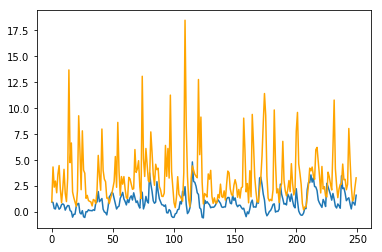

In [187]:
plt.plot(FX.T[1])
plt.plot(X.T[1],'orange')
plt.show()